###Loading the dataset

In [ ]:
import pandas as pd

file_path = '/content/death .csv'
data = pd.read_csv(file_path)
rows, columns = data.shape
print(data.head())

                        County   FIPS Met Objective of 45.5? (1)  \
0                United States      0                         No   
1       Perry County, Kentucky  21193                         No   
2      Powell County, Kentucky  21197                         No   
3  North Slope Borough, Alaska   2185                         No   
4      Owsley County, Kentucky  21189                         No   

  Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
0                      46                                         45.9   
1                   125.6                                        108.9   
2                   125.3                                        100.2   
3                   124.9                                           73   
4                   118.5                                         83.1   

  Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
0                                         46.1                 157,376  

###Preprocess for outliers

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [
    'Age-Adjusted Death Rate',
    'Lower 95% Confidence Interval for Death Rate',
    'Upper 95% Confidence Interval for Death Rate',
    'Average Deaths per Year'
]

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data_clean = data.dropna(subset=numerical_columns)
numerical_data = data_clean[numerical_columns]
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)


###Training the clustering model (Kmean)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

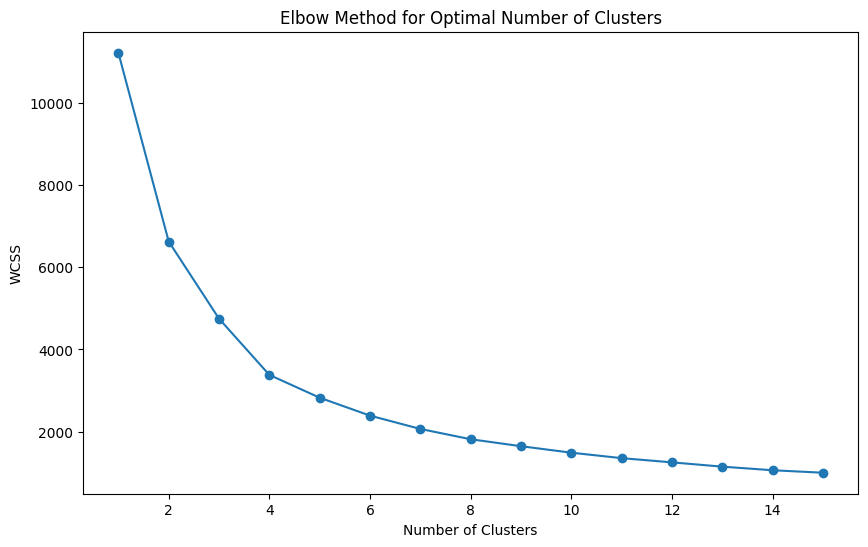

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
max_clusters = 15

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(numerical_data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 5  # Example value from elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(numerical_data_scaled)
clusters = kmeans.labels_


###Test the model that is created

In [ ]:
data_clean['Cluster'] = clusters

numeric_data_with_clusters = data_clean[numerical_columns + ['Cluster']]
cluster_analysis = numeric_data_with_clusters.groupby('Cluster').mean()
print(cluster_analysis)


         Age-Adjusted Death Rate  \
Cluster                            
0                      61.813003   
1                      49.031558   
2                      80.354545   
3                      45.750000   
4                      35.227586   

         Lower 95% Confidence Interval for Death Rate  \
Cluster                                                 
0                                           49.865938   
1                                           39.713869   
2                                           63.647273   
3                                           43.702586   
4                                           26.632123   

         Upper 95% Confidence Interval for Death Rate  Average Deaths per Year  
Cluster                                                                         
0                                           76.669965                34.048331  
1                                           60.742211                42.767839  
2                      

<ipython-input-10-bea0c0034a7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = clusters


###Visualizing the clusters using PCA

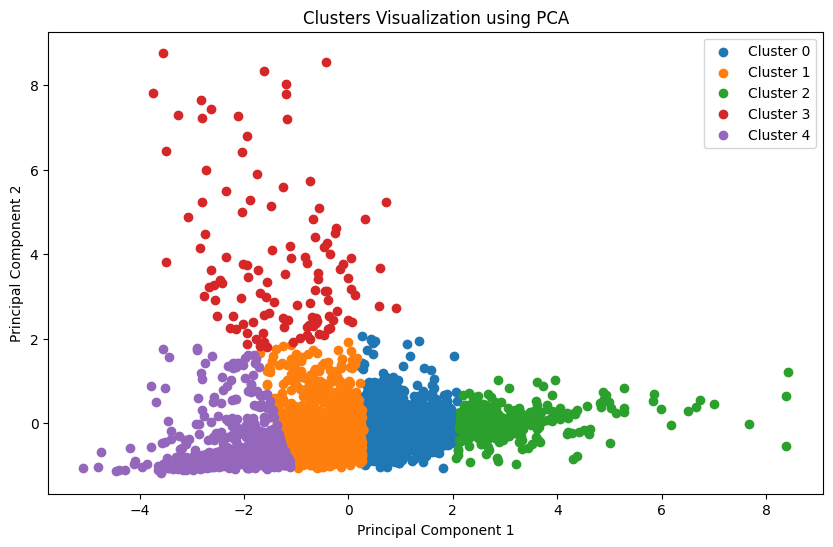

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
